CSV data breakdown:

The Donations.csv file contains the following columns:

- TotalDailyDonation: The total number of donations made on a given day.
- DateofDonation: The date on which the donation(s) were made.
- DonationAmount: The amount of the donation before fees.
- Fees: The fees associated with the donation.
- DonationReceived: The net amount received after fees.


In [16]:
import pandas as pd
import numpy as np
import pyrsm as rsm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the DonationsCSV file
df = pd.read_csv('Donations.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,TotalDailyDonation,DateofDonation,DonationAmount,Fees,DonationReceived
0,0,2/26/2024,0.0,0.0,0.0
1,0,2/25/2024,0.0,0.0,0.0
2,0,2/24/2024,0.0,0.0,0.0
3,1,2/23/2024,5.6,-0.6,5.0
4,0,2/22/2024,0.0,0.0,0.0


Below is overall summary statistical analysis of the donations.csv data set as well as plotting options

In [7]:
# Compute overall summary statistics for the dataset
overall_summary = df.describe()

# Compute summary statistics for specific columns
donation_amount_summary = df['DonationAmount'].describe()
fees_summary = df['Fees'].describe()
donation_received_summary = df['DonationReceived'].describe()

# Print the summary statistics
print("Overall Summary Statistics:")
print(overall_summary)
print("\nDonation Amount Summary:")
print(donation_amount_summary)
print("\nFees Summary:")
print(fees_summary)
print("\nDonation Received Summary:")
print(donation_received_summary)

Overall Summary Statistics:
       TotalDailyDonation  DonationAmount       Fees  DonationReceived
count           26.000000       26.000000  26.000000         26.000000
mean             0.961538       22.701154  -0.922692         21.778462
std              3.026295       69.976070   2.756223         67.346463
min              0.000000        0.000000 -10.750000          0.000000
25%              0.000000        0.000000   0.000000          0.000000
50%              0.000000        0.000000   0.000000          0.000000
75%              0.000000        0.000000   0.000000          0.000000
max             13.000000      318.710000   0.000000        307.960000

Donation Amount Summary:
count     26.000000
mean      22.701154
std       69.976070
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      318.710000
Name: DonationAmount, dtype: float64

Fees Summary:
count    26.000000
mean     -0.922692
std       2.756223
min     -10.750000
25%       0.000000


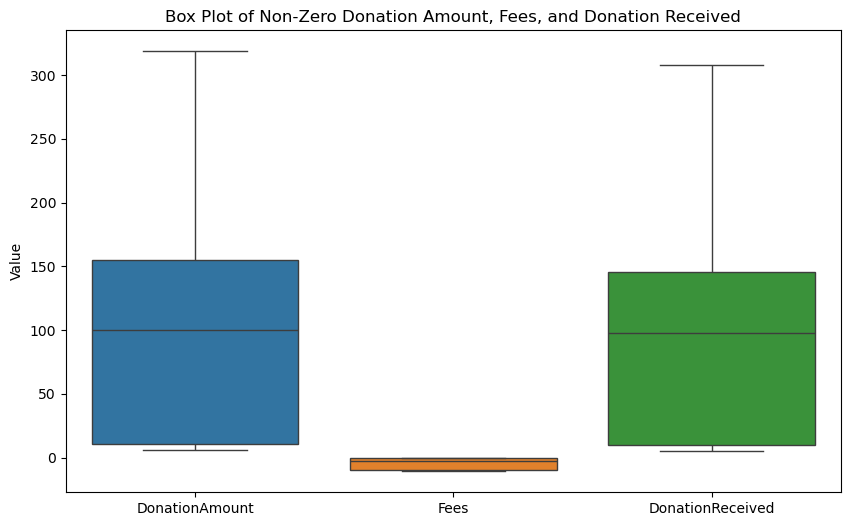

In [14]:
# Convert DateofDonation to datetime format for better handling
df['DateofDonation'] = pd.to_datetime(df['DateofDonation'])

# Convert DateofDonation to datetime format for better handling
df['DateofDonation'] = pd.to_datetime(df['DateofDonation'])

# Filter out rows where DonationAmount is zero
df_non_zero = df[df['DonationAmount'] > 0]

# Box Plot for Non-Zero Donation Amount, Fees, and Donation Received
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_non_zero[['DonationAmount', 'Fees', 'DonationReceived']])
plt.title('Box Plot of Non-Zero Donation Amount, Fees, and Donation Received')
plt.ylabel('Value')
plt.show()

Time series analysis of the donations data, we can focus on plotting the trend of total daily donations received over time. This involves creating a time series plot that shows how the DonationReceived values change on a daily basis. To enhance the analysis, we can also include a rolling average to smooth out short-term fluctuations and highlight longer-term trends in the data.

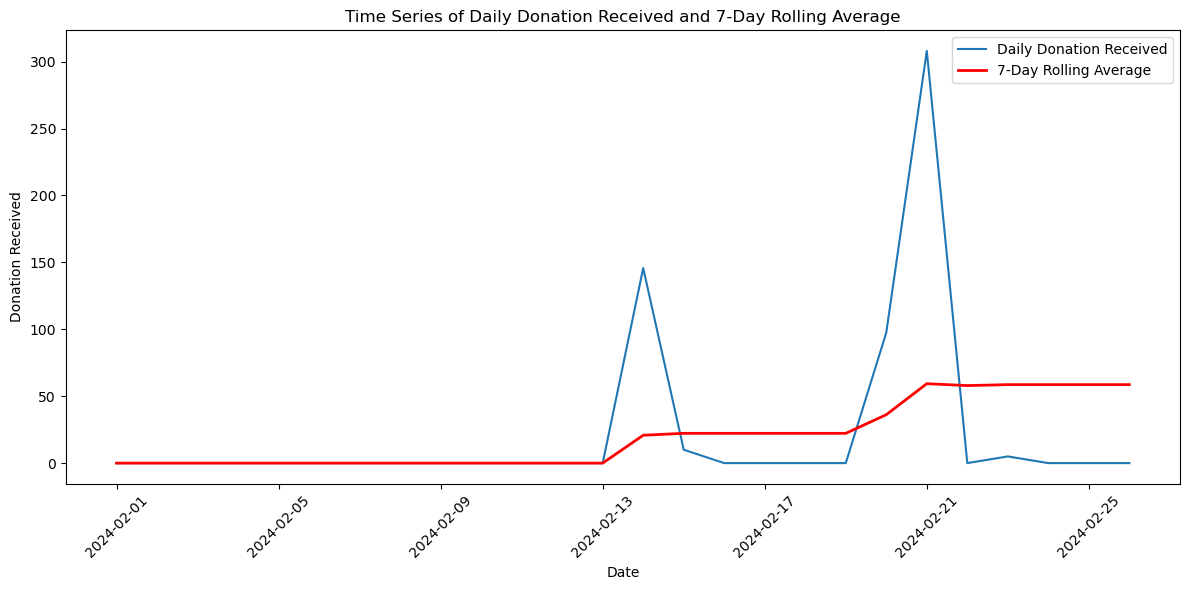

In [11]:
# Convert DateofDonation to datetime format and ensure it's sorted
df['DateofDonation'] = pd.to_datetime(df['DateofDonation'])
df.sort_values('DateofDonation', inplace=True)

# Calculate a 7-day rolling average for DonationReceived
df['RollingAvgDonationReceived'] = df['DonationReceived'].rolling(window=7, min_periods=1).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['DateofDonation'], df['DonationReceived'], label='Daily Donation Received')
plt.plot(df['DateofDonation'], df['RollingAvgDonationReceived'], label='7-Day Rolling Average', color='red', linewidth=2)
plt.title('Time Series of Daily Donation Received and 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Donation Received')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Donation Amount Analysis, we can examine the distribution of donation amounts, identify common donation sizes, and categorize donations into different ranges (e.g., small, medium, large). This analysis helps understand the behavior of donors and the variability in donation amounts.

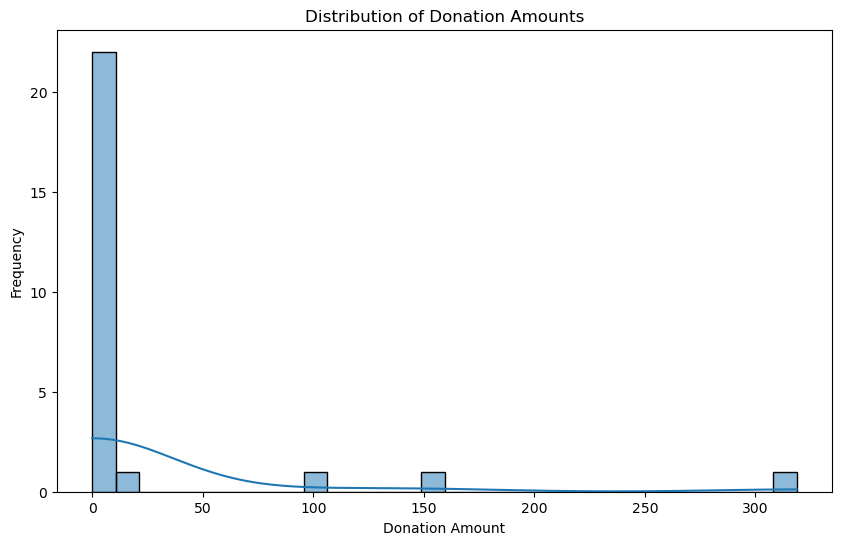

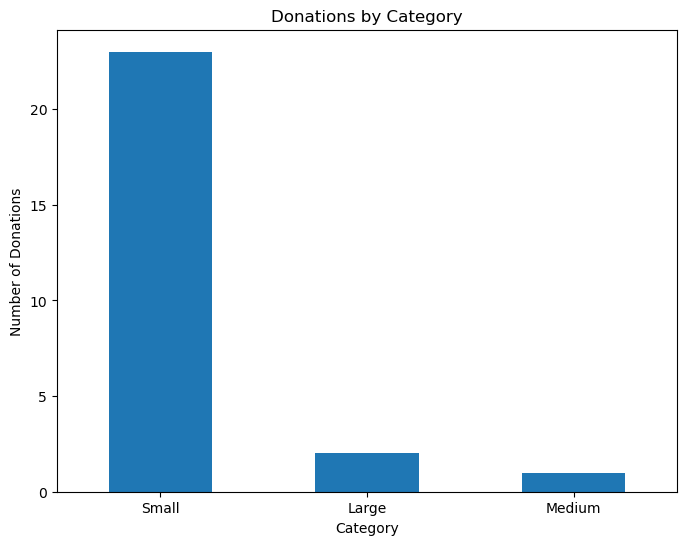

DonationCategory
Small     23
Large      2
Medium     1
Name: count, dtype: int64


In [17]:
# Distribution Analysis
# Plotting a histogram of DonationAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['DonationAmount'], bins=30, kde=True)
plt.title('Distribution of Donation Amounts')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.show()

# Categorization
# Define donation categories based on conditions
conditions = [
    (df['DonationAmount'] <= 20), # Small donations
    (df['DonationAmount'] > 20) & (df['DonationAmount'] <= 100), # Medium donations
    (df['DonationAmount'] > 100) # Large donations
]
choices = ['Small', 'Medium', 'Large']
df['DonationCategory'] = np.select(conditions, choices, default='Undefined')

# Summary by Category
# Count the number of donations in each category
donation_category_counts = df['DonationCategory'].value_counts()

# Plotting the counts of each category
plt.figure(figsize=(8, 6))
donation_category_counts.plot(kind='bar')
plt.title('Donations by Category')
plt.xlabel('Category')
plt.ylabel('Number of Donations')
plt.xticks(rotation=0) # Keep the category names horizontal for readability
plt.show()

# Displaying the counts
print(donation_category_counts)

Correlation analysis on your donations data, using the Pearson correlation coefficient, which measures the linear correlation between two variables. The coefficient's value ranges from -1 to 1, where:

1 indicates a perfect positive linear correlation,
-1 indicates a perfect negative linear correlation, and
0 indicates no linear correlation.

                    DonationAmount      Fees  DonationReceived  \
DonationAmount            1.000000 -0.955830          0.999928   
Fees                     -0.955830  1.000000         -0.952225   
DonationReceived          0.999928 -0.952225          1.000000   
TotalDailyDonation        0.837712 -0.961224          0.831082   

                    TotalDailyDonation  
DonationAmount                0.837712  
Fees                         -0.961224  
DonationReceived              0.831082  
TotalDailyDonation            1.000000  


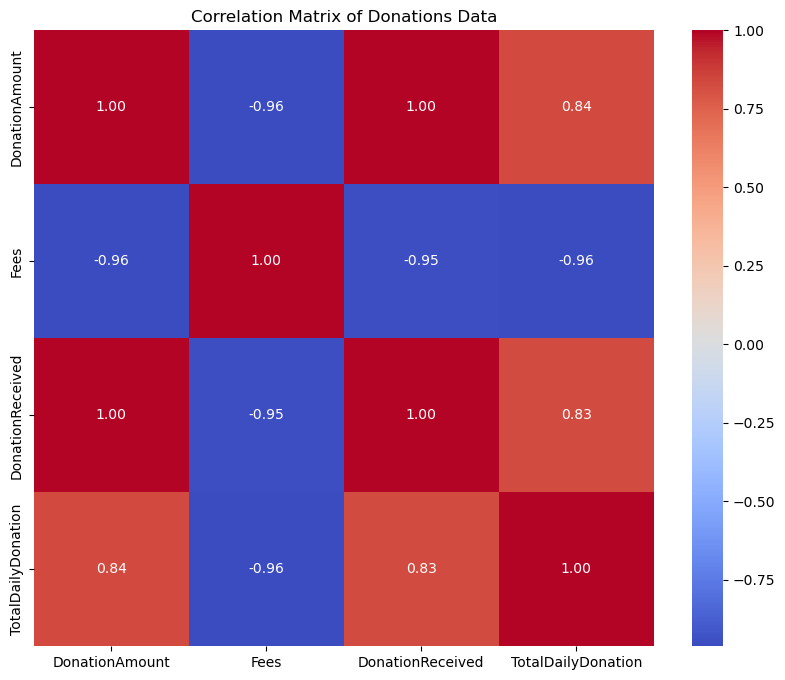

In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['DonationAmount', 'Fees', 'DonationReceived', 'TotalDailyDonation']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualizing the correlation matrix with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Donations Data')
plt.show()